### Gradient descent (GD) is an iterative first-order optimisation algorithm, used to find a local minimum/maximum of a given function


first-order - the use of first derivatives (gradients) of the function

    Function requirements

There are two specific requirements. A function has to be:

``differentiable`` -  A function is differentiable it has a derivative for each point in its domain

``convex`` - A univariate function is convex if its second derivative is always greater than 0.

**
It is also possible to use quasi-convex functions with a gradient descent algorithm. However, often they have so-called saddle points (called also minimax points) where the algorithm can get stuck 

An existence of a saddle point imposes a real challenge for the first-order gradient descent algorithms like GD, and obtaining a global minimum is not guaranteed. Second-order algorithms deal with these situations better (e.g. Newton-Raphson method) 

"saddle point" : The point is neither a local minimum nor a local maximum, it is a minimum in one direction and a maximum in another.
**

When the function F is convex, all local minima are also global minima, so in this case gradient descent can converge to the global solution.

#### Gradient

In the case of a univariate function, it is simply the first derivative at a selected point. 

In the case of a multivariate function, it is a vector of derivatives in each main direction (along variable axes). Because we are interested only in a slope along one axis and we don’t care about others these derivatives are called partial derivatives.


A gradient for an n-dimensional function f(x) at a given point p is defined as follows:

$$
\nabla f(\mathbf{p}) = \begin{bmatrix} 
\frac{\partial f}{\partial x_1}(\mathbf{p}) \\
\frac{\partial f}{\partial x_2}(\mathbf{p}) \\
\vdots \\
\frac{\partial f}{\partial x_n}(\mathbf{p}) 
\end{bmatrix}
$$

The upside-down triangle is a so-called nabla symbol and you read it “del”.


#### Gradient Descent Algorithm 

Gradient Descent Algorithm iteratively calculates the next point using gradient at the current position, scales it (by a learning rate) and subtracts obtained value from the current position (makes a step). It subtracts the value because we want to minimise the function (to maximise it would be adding). This process can be written as:

  1. choose a starting point (initialisation)
  2. calculate gradient at this point
  3. Make a scaled step in the opposite direction to the gradient (objective: minimise)
  4. repeat points 2 and 3 until one of the criteria is met:
    - maximum number of iterations reached
    - step size is smaller than the tolerance (due to scaling or a small gradient).

In [1]:
import numpy as np
from typing import Callable

def gradient_descent(start: float, gradient: Callable[[float], float],
                     learn_rate: float, max_iter: int, tol: float = 0.01):
    x = start
    steps = [start]  # history tracking

    for _ in range(max_iter):
        diff = learn_rate*gradient(x)
        if np.abs(diff) < tol:
            break
        x = x - diff
        steps.append(x)  # history tracing
  
    return steps, x

In [6]:
# Example f(x) = x^2-4x+! f'(x) = 2x-4

def func1(x:float):
    return x**2-4*x+1

def gradient_func1(x:float):
    return 2*x - 4

# learning rate of 0.1 and starting point at x=9, epochs=100
# starting point is often a random initialisation
history, result = gradient_descent(9, gradient_func1, 0.1, 100)
print(history)
print(result)

[9, 7.6, 6.4799999999999995, 5.584, 4.8671999999999995, 4.29376, 3.8350079999999998, 3.4680063999999997, 3.17440512, 2.939524096, 2.7516192768, 2.60129542144, 2.481036337152, 2.3848290697216, 2.30786325577728, 2.246290604621824, 2.197032483697459, 2.1576259869579673, 2.1261007895663737, 2.100880631653099, 2.080704505322479, 2.064563604257983, 2.0516508834063862, 2.041320706725109]
2.041320706725109


#### Example f(x) = x^4 - 2x^3 + 2

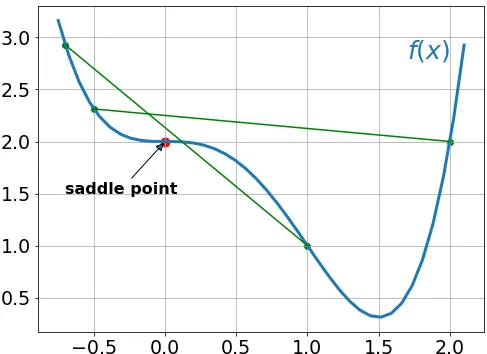

In [ ]:
def func2(x:float):
    return x**4-2*x**3+2

def gradient_func2(x:float):
    return 4*x**3 - 6*x**2

# learning rate of 0.1 and starting point at x=-0.5, epochs=100
# starting point is often a random initialisation
history2, result2 = gradient_descent(-0.5, gradient_func2, 0.1, 100)
print(history2)
print(result2)

# learning rate of 0.1 and starting point at x=2, epochs=100
# starting point is often a random initialisation
history2, result2 = gradient_descent(2, gradient_func2, 0.1, 100)
print(history2)
print(result2)

# learning rate of 0.3 and starting point at x=-0.5, epochs=100
# starting point is often a random initialisation
history2, result2 = gradient_descent(-0.5, gradient_func2, 0.3, 100)
print(history2)
print(result2)

# learning rate of 0.3 and starting point at x=2, epochs=100
# starting point is often a random initialisation
history2, result2 = gradient_descent(2, gradient_func2, 0.3, 100)
print(history2)
print(result2)

# learning rate of 0.4 and starting point at x=-0.5, epochs=100
# starting point is often a random initialisation
history2, result2 = gradient_descent(-0.5, gradient_func2, 0.4, 100)
print(history2)
print(result2)

[-0.5, -0.3, -0.23519999999999996, -0.19680416071679996, -0.17051599623997293, -0.15108742413575793, -0.13601140448213242, -0.1239055076466225]
-0.1239055076466225
[2, 1.2, 1.3728000000000002, 1.4686874222592001, 1.4957044497076786]
1.4957044497076786
[-0.5, 0.09999999999999998, 0.11679999999999997, 0.13944393564159996, 0.17119051604543384, 0.21792133233725358, 0.290983980805998, 0.41382727756836546, 0.6370397026607622, 1.0572871280326779, 1.6511542540539295, 1.156642161574307, 1.7078637907412397, 0.9803075822922573, 1.5796187217832145, 1.3412216087275026, 1.6839686599698347, 1.0579416081097825, 1.651665166236616, 1.1551744745530905, 1.7073483056612457, 0.9820344184443454, 1.5814604049582477, 1.336979774588207, 1.6866610763524537, 1.0494392291430834, 1.6448945924080225, 1.1744488209358737, 1.7132998432090134, 0.9619563450541034, 1.559417243223825, 1.3860294942776776, 1.648764938748885, 1.1634771974423028, 1.710129894765032, 0.972688882421927, 1.5713707131053734, 1.3598959284989187, 1.6

##### Convergence rate of Gradient Descent

Normally, standard gradient descent for convex functions converges at a rate of 

$$O\left(\frac{1}{k}\right)$$

where \( k \) is the iteration number. This means that with each step, the improvement in the objective function gets slower as you get closer to the optimal solution.


### References

[Gradient Descent Algorithm: A Deep Dive](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21) 